In [1]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings("ignore")

In [19]:
df = pd.read_csv("EBITDA_new.csv")
df

,ticker,fiscalQuarter,commonSharesOutstanding_,commonSharesTraded_,capitalExpenditure_,netIncome_,operatingIncome_,shareholdersEquity_,totalAssets_,EPS_,...,EBITDA,salePrice,realGDPSA,m2SA,m2m1GrowthGap,m2Velocity,primeRate,EBITDA_lag1,year,quarter
0,ACAN,2013Q1,-0.000933,12.247579,0.000000,-0.073272,-0.095742,-0.003005,0.00000,0.00,...,50.369,13.564960,-0.867729,9.261987,0.172473,1.581,3.250000,NaN,2013,1
1,ACAN,2013Q2,-0.000933,12.247579,0.000000,-0.073210,-0.095754,-0.003005,0.00000,0.00,...,42.617,13.651304,-0.849252,9.272702,-0.640550,1.572,3.250000,50.369,2013,2
2,ACAN,2013Q3,-0.000933,12.247579,0.000000,-0.073519,-0.095692,-0.003005,0.00000,0.00,...,46.147,13.650265,-0.790315,9.286502,-0.328302,1.571,3.250000,42.617,2013,3
3,ACAN,2013Q4,-0.000933,12.247579,0.000000,-0.072407,-0.095729,0.000000,0.00000,0.00,...,67.587,13.978878,-0.729457,9.305890,-1.494308,1.563,3.250000,46.147,2013,4
4,ACAN,2014Q1,-0.000933,12.247579,0.000000,-0.073519,-0.095692,-0.006018,0.00000,0.00,...,70.192,13.796973,-0.753759,9.321372,-1.579023,1.539,3.250000,67.587,2014,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,TNL,2022Q4,1.116244,14.488942,3.970292,2.422222,2.417428,NaN,4848.35925,1.12,...,177.311,14.303885,0.925248,9.968103,1.365277,1.253,6.819672,137.428,2022,4
535,TNL,2023Q1,1.077239,14.488942,2.564949,2.422222,2.417428,NaN,4848.35925,0.81,...,95.775,14.193683,0.985434,9.956538,1.945551,1.288,7.693548,177.311,2023,1
536,TNL,2023Q2,1.037409,14.488942,3.367296,2.422222,2.417428,NaN,4848.35925,1.25,...,149.372,14.029054,1.038587,9.941376,2.367239,1.322,8.158730,95.775,2023,2
537,TNL,2023Q3,1.009074,14.488942,3.761200,2.422222,2.417428,NaN,4848.35925,1.49,...,144.879,14.013110,1.132989,9.940176,1.509829,1.348,8.432540,149.372,2023,3


In [20]:
df.dropna(inplace=True)

In [21]:
train = df[df['year'] < 2021]
test = df[df['year'] >= 2021]

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

# use lag1 as predicted value
y_true_train = train["EBITDA"]
y_pred_train = train["EBITDA_lag1"]

y_true_test = test["EBITDA"]
y_pred_test = test["EBITDA_lag1"]

def calculatePerformance(y_true, y_pred):
    # Compute RMSE, R-Squared, and MPAE for each target column
    rmse = mean_squared_error(y_true, y_pred)
    r_squared = r2_score(y_true, y_pred)
    mpae = mean_absolute_percentage_error(y_true, y_pred)

    performance_metrics = {'RMSE': rmse, 'R-Squared': r_squared, 'MPAE': mpae}
    # Convert results to DataFrame for better visualization
    performance_df = pd.DataFrame.from_dict(performance_metrics, orient='index')
    return performance_df

performan_train = calculatePerformance(y_true_train, y_pred_train)
performan_test = calculatePerformance(y_true_test, y_pred_test)

print("performance on training set\n", performan_train)
print("\n")
print("performance on testing set\n", performan_test)

performance on training set
                     0
RMSE       389.118776
R-Squared    0.931669
MPAE       116.172742


performance on testing set
                     0
RMSE       300.531013
R-Squared    0.953478
MPAE         0.889287


In [13]:
df = df[['ticker', 'fiscalQuarter', 'EBITDA']]

In [14]:
# Drop any pre-existing date column
df = df.drop(columns='date', errors='ignore')

quarter_to_month = {
    'Q1': 1,  
    'Q2': 4,  
    'Q3': 7,  
    'Q4': 10  
}

# get year and quarter
df['date'] = df['fiscalQuarter'].apply(lambda x: pd.to_datetime(f"{x[:4]}-{quarter_to_month[x[4:]]}-01"))

# sort by id and date
df = df.sort_values(by=['ticker', 'date'])

# reset index
df.set_index(['ticker', 'date'], inplace=True)

df.head()

fiscalQuarter  EBITDA
ticker date                            
ACAN   2013-04-01        2013Q2  42.617
       2013-07-01        2013Q3  46.147
       2013-10-01        2013Q4  67.587
       2014-01-01        2014Q1  70.192
       2014-04-01        2014Q2  50.366

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=453.419, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=447.428, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=435.105, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=451.649, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=437.104, Time=0.37 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=437.103, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=435.601, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=435.966, Time=0.04 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.667 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=261.360, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=287.034, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=269.727, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=258.094, Time=0.07 

C:\Users\17470\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=66.317, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=60.242, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=62.544, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=67.360, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=60.003, Time=0.07 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=56.791, Time=0.09 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=58.236, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=58.482, Time=0.34 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=57.656, Time=0.26 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=60.018, Time=0.18 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=61.187, Time=0.06 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0] intercept
Total fit time: 1.728 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.22 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=389.276, Tim

C:\Users\17470\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=510.591, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=512.570, Time=0.00 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=512.569, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=509.600, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.777 seconds


C:\Users\17470\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

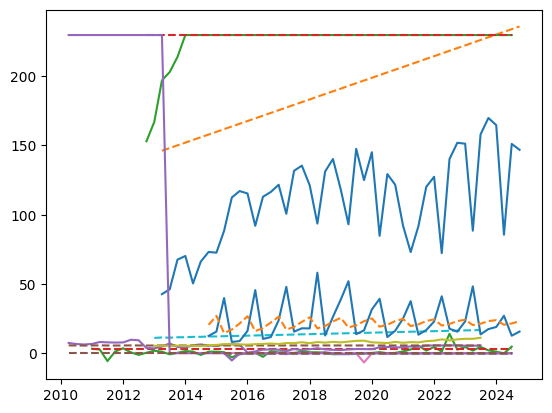

In [ ]:
forecast_results = {}
actual_results = {}

# fit ARIMA on each company
for ticker in df.index.get_level_values('ticker').unique():
    company_data = df.loc[ticker, 'EBITDA']
    
    # automatically find best parameters
    model = auto_arima(company_data, 
                       seasonal=False, 
                       trace=True,  
                       suppress_warnings=True, 
                       stepwise=True)  
    
    # predict
    forecast = model.predict(n_periods=len(company_data))
    forecast_results[ticker] = forecast
    actual_results[ticker] = company_data
    
    # plot predicted value and true value
    plt.plot(company_data.index, company_data, label=f'{ticker} actual')
    plt.plot(company_data.index, forecast, label=f'{ticker} forecast', linestyle='--')

plt.title('Company EBITDA Forecast (2010-2024)')
plt.xlabel('Date')
plt.ylabel('EBITDA')
plt.legend()
plt.show()

# calculate R²
r2_scores = {}
for ticker in forecast_results:
    r2_scores[ticker] = r2_score(actual_results[ticker], forecast_results[ticker])
    
print("R² Scores:")
for ticker, r2 in r2_scores.items():
    print(f"{ticker}: {r2:.4f}")

In [20]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Compute RMSE per ticker by sqrt of MSE
rmse_scores = {
    ticker: mean_squared_error(actual_results[ticker],
                               forecast_results[ticker]) ** 0.5
    for ticker in forecast_results
}

# Now average both metrics
avg_r2   = np.mean(list(r2_scores.values()))
avg_rmse = np.mean(list(rmse_scores.values()))

print(f"Average ARIMA R²: {avg_r2:.3f}")
print(f"Average ARIMA RMSE: {avg_rmse:.3f}")


Average ARIMA R²: -2.392
Average ARIMA RMSE: 28.730
